#pips

In [1]:
!pip install xgboost
!pip install openpyxl
!pip install pygam
!pip install catboost
!pip install lightgbm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 48.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 19.0 MB/s eta 0:00:00


#Libraries

In [2]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,
    confusion_matrix, roc_curve, precision_recall_curve, auc
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from pygam import LogisticGAM, s, te  # For GAM (Generalized Additive Models)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


#Data

In [3]:
data = joblib.load('/content/drive/MyDrive/Bankruptcy Prediction Data/Prepared Dataset for Thesis/Dataset.pkl')
print(data.head())

X = data.drop(columns=['result'])
y = data['result']

   Profitability Ratios (Return from Sales) EBIT/Sales last avail. Year  \
0                                           1.281861                      
1                                           0.022043                      
2                                           3.210585                      
3                                          51.385155                      
4                                          37.085847                      

   Profitability Ratios (Return from Sales) EBIT/Sales last year -1  \
0                                          -0.073507                  
1                                          -0.027587                  
2                                          -2.198620                  
3                                          -2.196863                  
4                                          -2.354131                  

   Profitability Ratios (Return from Sales) EBIT/Sales last year -2  \
0                                           0.03703

In [4]:
data.shape

(255919, 61)

In [5]:

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Models

In [6]:
ratio = len(y[y == 0]) / len(y[y == 1])  # Majority class/ Minority class for XGBoost

In [7]:
models = {

    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42, scale_pos_weight=ratio),
    "LightGBM": LGBMClassifier(boosting_type="gbdt", n_estimators=100, max_depth=-1, random_state=42, scale_pos_weight=ratio),
    "CatBoost": CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, random_state=42, scale_pos_weight=ratio, verbose=0),

  }

#Fitting models and Evaluations

In [8]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [9]:
cv_results = {model_name: [] for model_name in models.keys()}
roc_curves_cv = {model_name: [] for model_name in models.keys()}
pr_curves_cv = {model_name: [] for model_name in models.keys()}

Training XGBoost with Cross-Validation
Mean Threshold for XGBoost: 0.77
Training LightGBM with Cross-Validation


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11344, number of negative: 91023
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012968 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 102367, number of used features: 60
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110817 -> initscore=-2.082423
[LightGBM] [Info] Start training from score -2.082423


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11344, number of negative: 91023
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012884 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 102367, number of used features: 60
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110817 -> initscore=-2.082423
[LightGBM] [Info] Start training from score -2.082423


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11344, number of negative: 91023
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012519 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 102367, number of used features: 60
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110817 -> initscore=-2.082423
[LightGBM] [Info] Start training from score -2.082423


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11344, number of negative: 91023
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 102367, number of used features: 60
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110817 -> initscore=-2.082423
[LightGBM] [Info] Start training from score -2.082423


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 11344, number of negative: 91024
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012648 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 102368, number of used features: 60
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110816 -> initscore=-2.082434
[LightGBM] [Info] Start training from score -2.082434


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Mean Threshold for LightGBM: 0.80
Training CatBoost with Cross-Validation
Mean Threshold for CatBoost: 0.79

Cross-validation Metrics for XGBoost:
  Fold 1:
    Accuracy: 0.9479
    Precision: 0.7849
    Recall: 0.7295
    F1: 0.7562
    ROC AUC: 0.9669
    PR AUC: 0.8402
    Class Accuracies: {'non_bankrupt': 0.9750834944629988, 'bankrupt': 0.7295486600846263}
  Fold 2:
    Accuracy: 0.9461
    Precision: 0.7637
    Recall: 0.7440
    F1: 0.7537
    ROC AUC: 0.9642
    PR AUC: 0.8316
    Class Accuracies: {'non_bankrupt': 0.9713042714009492, 'bankrupt': 0.7440056417489421}
  Fold 3:
    Accuracy: 0.9442
    Precision: 0.7339
    Recall: 0.7789
    F1: 0.7557
    ROC AUC: 0.9661
    PR AUC: 0.8350
    Class Accuracies: {'non_bankrupt': 0.9648004921778871, 'bankrupt': 0.7789139633286318}
  Fold 4:
    Accuracy: 0.9487
    Precision: 0.7795
    Recall: 0.7493
    F1: 0.7641
    ROC AUC: 0.9701
    PR AUC: 0.8491
    Class Accuracies: {'non_bankrupt': 0.9735893830198629, 'bankrupt': 0.749

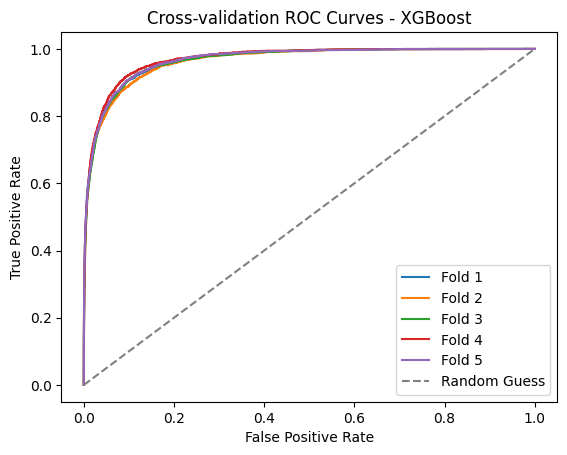

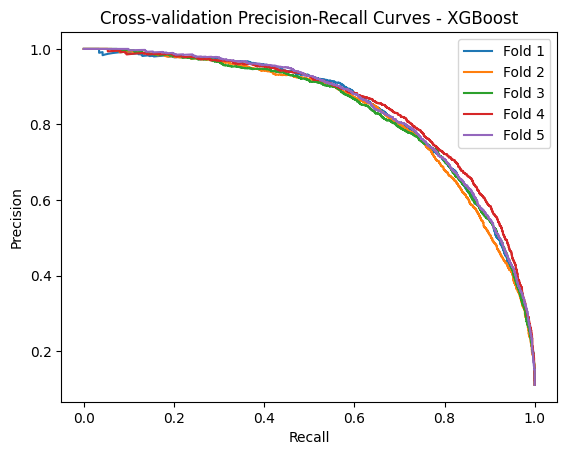


Cross-validation Metrics for LightGBM:
  Fold 1:
    Accuracy: 0.9461
    Precision: 0.7501
    Recall: 0.7705
    F1: 0.7601
    ROC AUC: 0.9678
    PR AUC: 0.8400
    Class Accuracies: {'non_bankrupt': 0.9680084373352082, 'bankrupt': 0.7704513399153737}
  Fold 2:
    Accuracy: 0.9461
    Precision: 0.7676
    Recall: 0.7362
    F1: 0.7516
    ROC AUC: 0.9654
    PR AUC: 0.8293
    Class Accuracies: {'non_bankrupt': 0.9722271049393566, 'bankrupt': 0.7362482369534555}
  Fold 3:
    Accuracy: 0.9460
    Precision: 0.7631
    Recall: 0.7440
    F1: 0.7534
    ROC AUC: 0.9676
    PR AUC: 0.8354
    Class Accuracies: {'non_bankrupt': 0.9712163824925294, 'bankrupt': 0.7440056417489421}
  Fold 4:
    Accuracy: 0.9476
    Precision: 0.7630
    Recall: 0.7641
    F1: 0.7636
    ROC AUC: 0.9709
    PR AUC: 0.8458
    Class Accuracies: {'non_bankrupt': 0.9704253823167516, 'bankrupt': 0.7641043723554302}
  Fold 5:
    Accuracy: 0.9451
    Precision: 0.7419
    Recall: 0.7733
    F1: 0.7573
    R

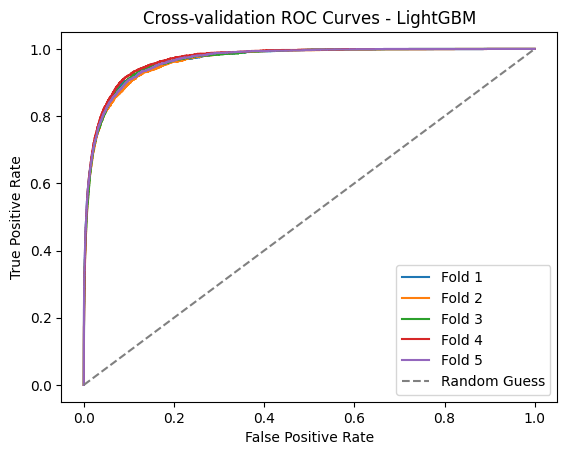

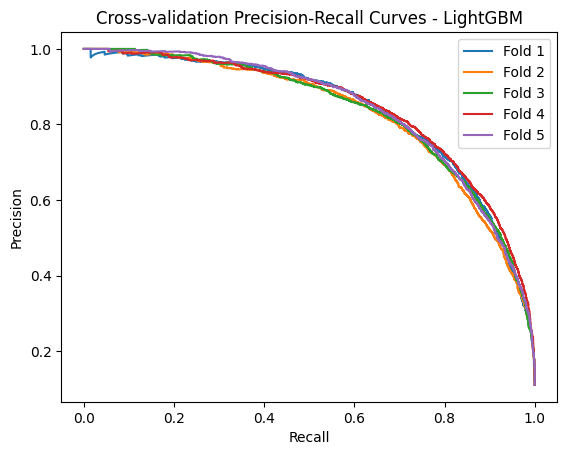


Cross-validation Metrics for CatBoost:
  Fold 1:
    Accuracy: 0.9419
    Precision: 0.7288
    Recall: 0.7571
    F1: 0.7426
    ROC AUC: 0.9632
    PR AUC: 0.8198
    Class Accuracies: {'non_bankrupt': 0.9648883810863069, 'bankrupt': 0.7570521861777151}
  Fold 2:
    Accuracy: 0.9394
    Precision: 0.7273
    Recall: 0.7243
    F1: 0.7258
    ROC AUC: 0.9600
    PR AUC: 0.8063
    Class Accuracies: {'non_bankrupt': 0.9661627702583934, 'bankrupt': 0.7242595204513399}
  Fold 3:
    Accuracy: 0.9372
    Precision: 0.6957
    Recall: 0.7697
    F1: 0.7308
    ROC AUC: 0.9617
    PR AUC: 0.8104
    Class Accuracies: {'non_bankrupt': 0.9580330462295659, 'bankrupt': 0.7697461212976022}
  Fold 4:
    Accuracy: 0.9406
    Precision: 0.7195
    Recall: 0.7606
    F1: 0.7395
    ROC AUC: 0.9656
    PR AUC: 0.8203
    Class Accuracies: {'non_bankrupt': 0.963042714009492, 'bankrupt': 0.7605782792665726}
  Fold 5:
    Accuracy: 0.9431
    Precision: 0.7543
    Recall: 0.7221
    F1: 0.7379
    RO

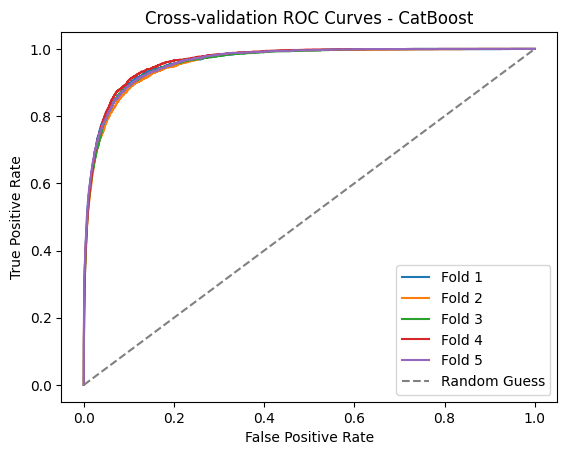

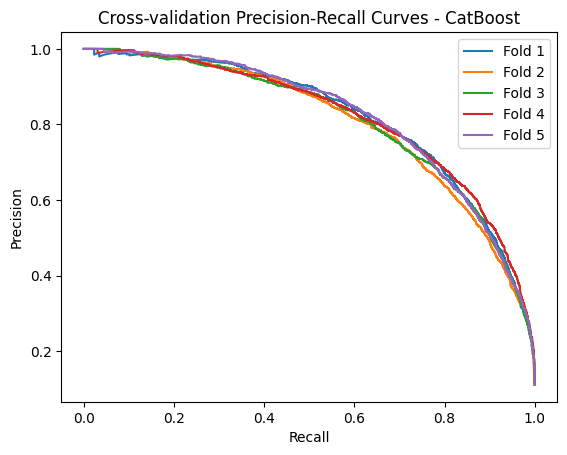


Final Training for XGBoost

Final Metrics for XGBoost:
  Accuracy: 0.9487
  Precision: 0.7748
  Recall: 0.7566
  F1 Score: 0.7656
  ROC AUC: 0.9684
  PR AUC: 0.8476
  Class Accuracies: {'non_bankrupt': 0.9725962383547196, 'bankrupt': 0.756558533145275}


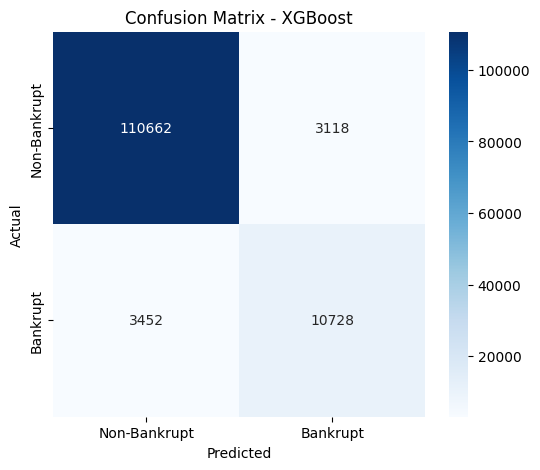

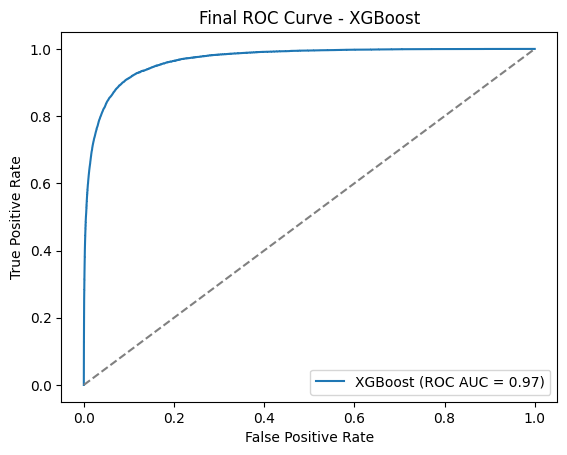

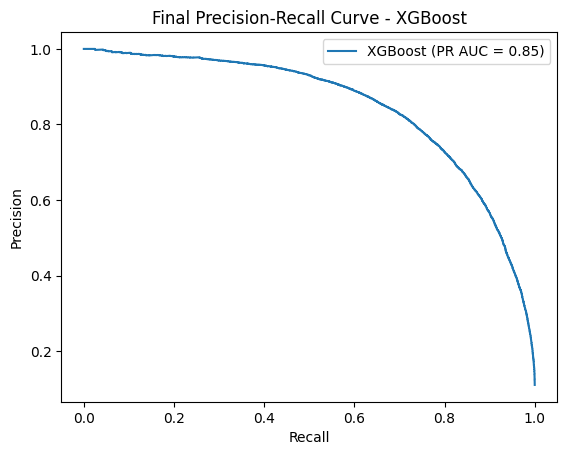


Final Training for LightGBM


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 14180, number of negative: 113779
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030632 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 127959, number of used features: 60
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110817 -> initscore=-2.082425
[LightGBM] [Info] Start training from score -2.082425


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Final Metrics for LightGBM:
  Accuracy: 0.9459
  Precision: 0.7416
  Recall: 0.7850
  F1 Score: 0.7627
  ROC AUC: 0.9693
  PR AUC: 0.8434
  Class Accuracies: {'non_bankrupt': 0.9659166813148181, 'bankrupt': 0.7849788434414668}


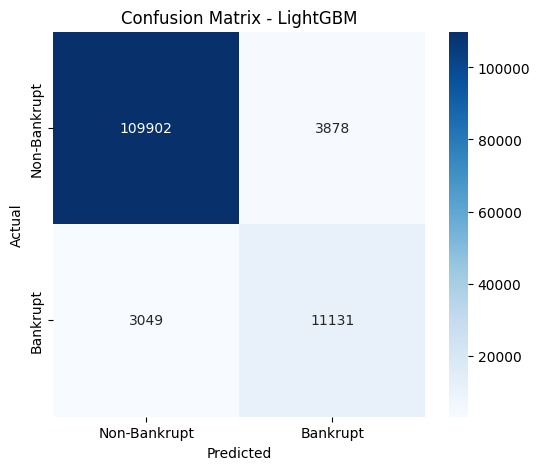

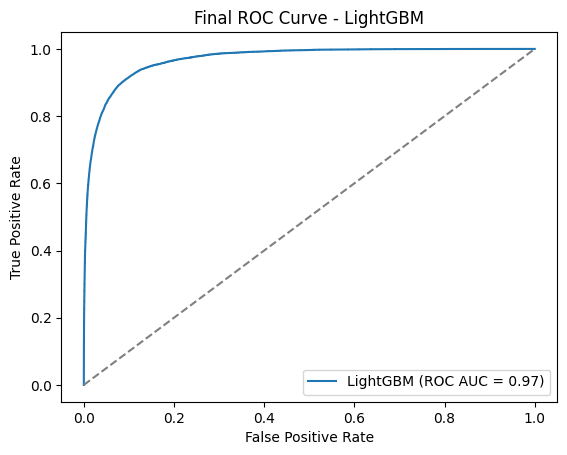

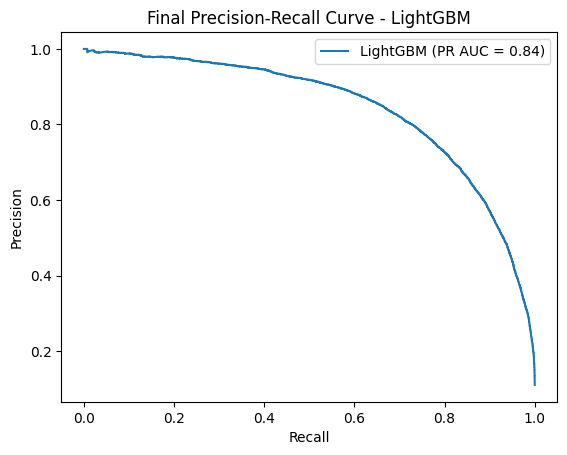


Final Training for CatBoost

Final Metrics for CatBoost:
  Accuracy: 0.9415
  Precision: 0.7256
  Recall: 0.7584
  F1 Score: 0.7417
  ROC AUC: 0.9642
  PR AUC: 0.8195
  Class Accuracies: {'non_bankrupt': 0.9642643698365266, 'bankrupt': 0.758392101551481}


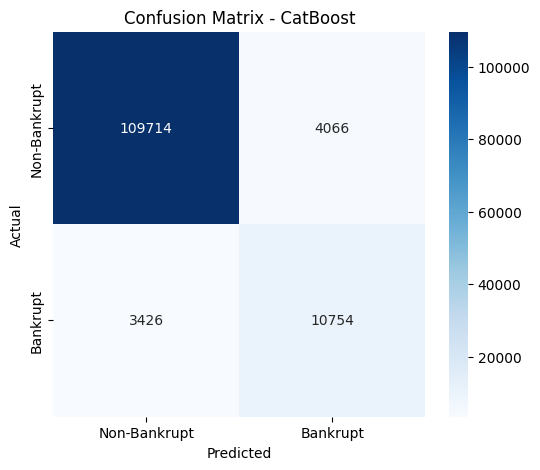

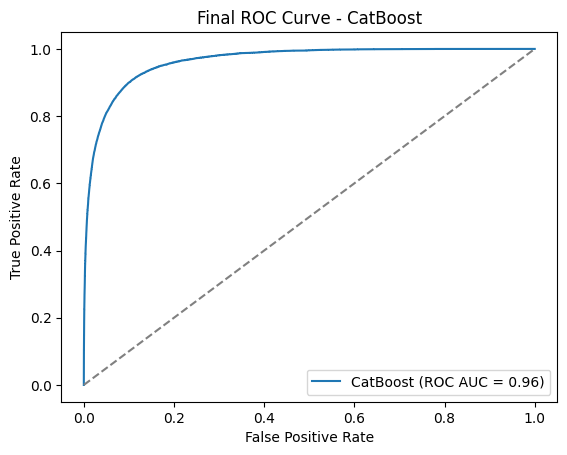

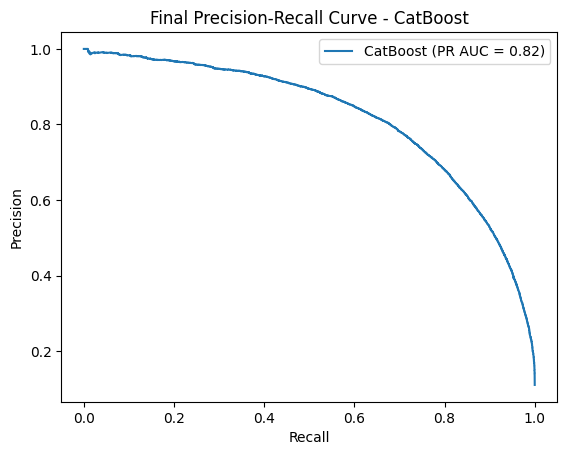

In [10]:
for model_name, model in models.items():
    print(f"Training {model_name} with Cross-Validation")
    thresholds = []

    for fold_idx, (train_index, val_index) in enumerate(cv.split(X_train, y_train)):
        X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
        y_fold_train, y_fold_val = y_train.values[train_index], y_train.values[val_index]

        model.fit(X_fold_train, y_fold_train)

        y_fold_proba = model.predict_proba(X_fold_val)[:, 1]
        best_threshold = 0.5
        best_f1 = 0

        for threshold in np.arange(0.1, 1.0, 0.01):
            y_fold_pred = (y_fold_proba >= threshold).astype(int)
            f1 = f1_score(y_fold_val, y_fold_pred)
            if f1 > best_f1:
                best_f1 = f1
                best_threshold = threshold

        thresholds.append(best_threshold)

        y_fold_pred = (y_fold_proba >= best_threshold).astype(int)

        # Metrics
        accuracy = accuracy_score(y_fold_val, y_fold_pred)
        precision = precision_score(y_fold_val, y_fold_pred)
        recall = recall_score(y_fold_val, y_fold_pred)
        f1 = f1_score(y_fold_val, y_fold_pred)
        roc_auc = roc_auc_score(y_fold_val, y_fold_proba)

        conf_matrix = confusion_matrix(y_fold_val, y_fold_pred)
        class_acc = {
            "non_bankrupt": conf_matrix[0, 0] / conf_matrix[0].sum(),
            "bankrupt": conf_matrix[1, 1] / conf_matrix[1].sum()
        }
        pr_curve_precision, pr_curve_recall, _ = precision_recall_curve(y_fold_val, y_fold_proba)
        pr_auc = auc(pr_curve_recall, pr_curve_precision)

        cv_results[model_name].append({
            "Fold": fold_idx + 1,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1": f1,
            "ROC AUC": roc_auc,
            "PR AUC": pr_auc,
            "Class Accuracies": class_acc
        })

        #curves
        fpr, tpr, _ = roc_curve(y_fold_val, y_fold_proba)
        roc_curves_cv[model_name].append((fpr, tpr))
        pr_curves_cv[model_name].append((pr_curve_precision, pr_curve_recall))

    #mean threshold
    mean_threshold = np.mean(thresholds)
    print(f"Mean Threshold for {model_name}: {mean_threshold:.2f}")

# Display Cross-validation Metrics
for model_name in models.keys():
    print(f"\nCross-validation Metrics for {model_name}:")
    for fold_metrics in cv_results[model_name]:
        print(f"  Fold {fold_metrics['Fold']}:")
        for metric, value in fold_metrics.items():
            if metric != "Fold" and metric != "Class Accuracies":
                print(f"    {metric}: {value:.4f}")
        print(f"    Class Accuracies: {fold_metrics['Class Accuracies']}")

    # Plot cross-validation ROC and PR curves
    plt.figure()
    for fold_idx, (fpr, tpr) in enumerate(roc_curves_cv[model_name]):
        plt.plot(fpr, tpr, label=f"Fold {fold_idx + 1}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
    plt.title(f"Cross-validation ROC Curves - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    plt.figure()
    for fold_idx, (precision, recall) in enumerate(pr_curves_cv[model_name]):
        plt.plot(recall, precision, label=f"Fold {fold_idx + 1}")
    plt.title(f"Cross-validation Precision-Recall Curves - {model_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.show()

# Final Model Training and Evaluation
final_results = {}
roc_curves_final = {}
pr_curves_final = {}

for model_name, model in models.items():
    print(f"\nFinal Training for {model_name}")
    model.fit(X_train, y_train)
    y_test_proba = model.predict_proba(X_test)[:, 1]

    # Use the mean threshold from CV
    mean_threshold = np.mean(thresholds)
    y_test_pred = (y_test_proba >= mean_threshold).astype(int)

    # Metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_proba)

    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_acc = {
        "non_bankrupt": conf_matrix[0, 0] / conf_matrix[0].sum(),
        "bankrupt": conf_matrix[1, 1] / conf_matrix[1].sum()
    }
    pr_curve_precision, pr_curve_recall, _ = precision_recall_curve(y_test, y_test_proba)
    pr_auc = auc(pr_curve_recall, pr_curve_precision)

    # Save results
    final_results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc,
        "Class Accuracies": class_acc
    }

    # Display final metrics
    print(f"\nFinal Metrics for {model_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")
    print(f"  PR AUC: {pr_auc:.4f}")
    print(f"  Class Accuracies: {class_acc}")

     # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Bankrupt', 'Bankrupt'],
                yticklabels=['Non-Bankrupt', 'Bankrupt'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Save final curves
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_curves_final[model_name] = (fpr, tpr)
    pr_curves_final[model_name] = (pr_curve_precision, pr_curve_recall)

    # Plot final curves
    plt.figure()
    plt.plot(fpr, tpr, label=f"{model_name} (ROC AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.title(f"Final ROC Curve - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(pr_curve_recall, pr_curve_precision, label=f"{model_name} (PR AUC = {pr_auc:.2f})")
    plt.title(f"Final Precision-Recall Curve - {model_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.show()






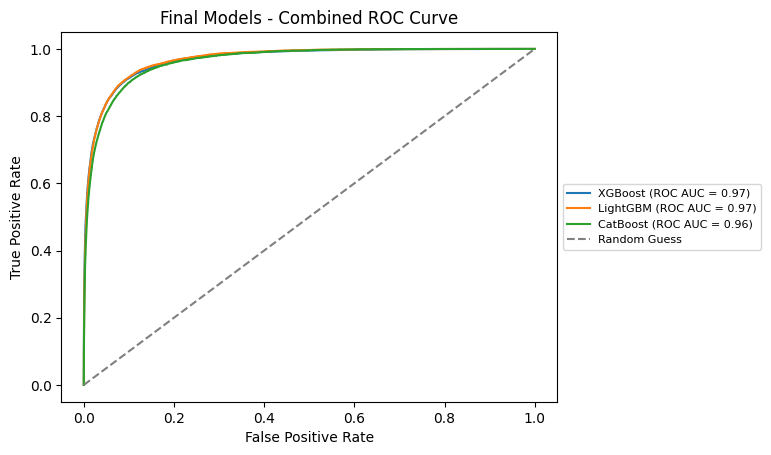

In [11]:
# Combined ROC Curve for Final Models
plt.figure()
for model_name, (fpr, tpr) in roc_curves_final.items():
    plt.plot(fpr, tpr, label=f"{model_name} (ROC AUC = {final_results[model_name]['ROC AUC']:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
plt.title("Final Models - Combined ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(fontsize=8, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


#Saving fit models

Saving

In [12]:
import joblib
import os
os.makedirs("saved_models", exist_ok=True)
for model_name, model in models.items():
    model_path = f"/content/drive/MyDrive/Bankruptcy Prediction Data/SCRIPTS/Saved fit models/{model_name}.pkl"
    joblib.dump(model, model_path)



In [13]:
import os
loaded_models = {}
for model_name in models.keys():
    model_path = f"/content/drive/MyDrive/Bankruptcy Prediction Data/SCRIPTS/Saved fit models/{model_name}.pkl"
    if os.path.exists(model_path):
        loaded_models[model_name] = joblib.load(model_path)
        print(f"{model_name} loaded from {model_path}.")
    else:
        print(f"{model_name} not found in {model_path}, please train the model.")


XGBoost loaded from /content/drive/MyDrive/Bankruptcy Prediction Data/SCRIPTS/Saved fit models/XGBoost.pkl.
LightGBM loaded from /content/drive/MyDrive/Bankruptcy Prediction Data/SCRIPTS/Saved fit models/LightGBM.pkl.
CatBoost loaded from /content/drive/MyDrive/Bankruptcy Prediction Data/SCRIPTS/Saved fit models/CatBoost.pkl.



Evaluating XGBoost on Test Data

Metrics for XGBoost:
  Accuracy: 0.9263
  Precision: 0.6189
  Recall: 0.8721
  F1 Score: 0.7240
  ROC AUC: 0.9684
  PR AUC: 0.8476
  Class Accuracies: {'non_bankrupt': 0.9330813851291967, 'bankrupt': 0.8720733427362483}


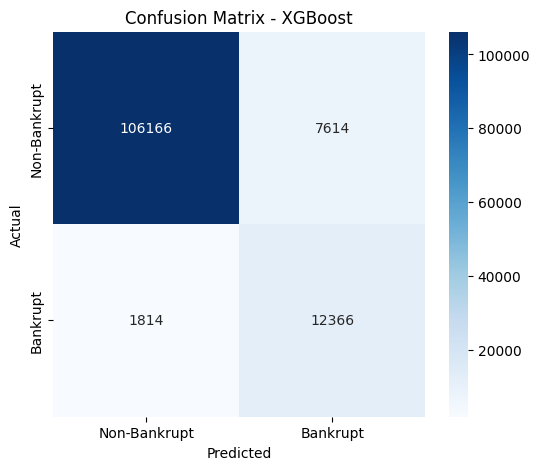

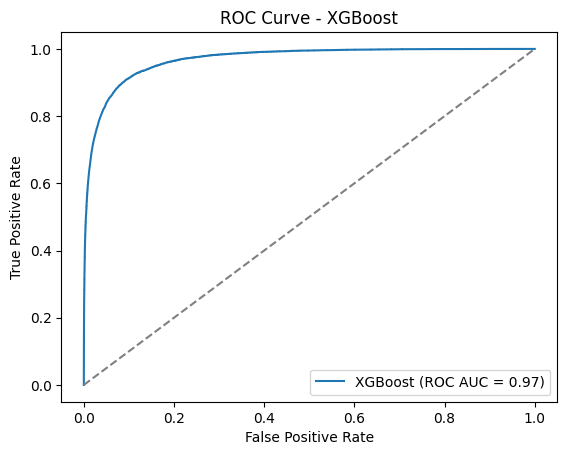

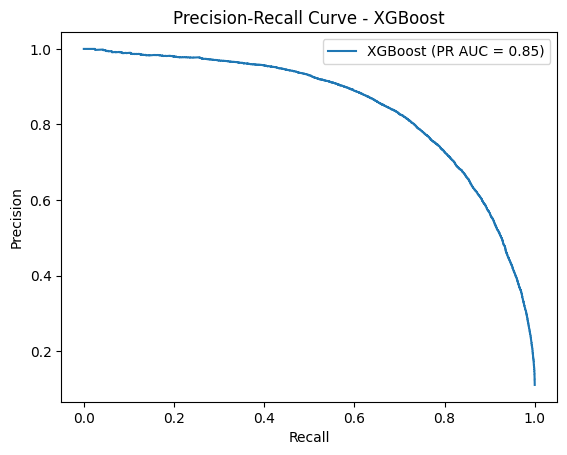


Evaluating LightGBM on Test Data


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Metrics for LightGBM:
  Accuracy: 0.9070
  Precision: 0.5484
  Recall: 0.9097
  F1 Score: 0.6843
  ROC AUC: 0.9693
  PR AUC: 0.8434
  Class Accuracies: {'non_bankrupt': 0.9066444014765337, 'bankrupt': 0.9096614950634697}


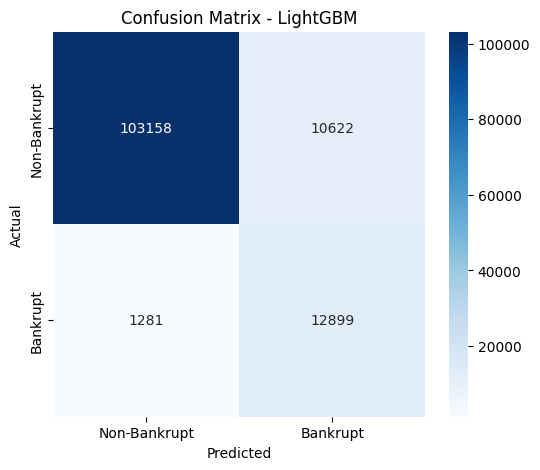

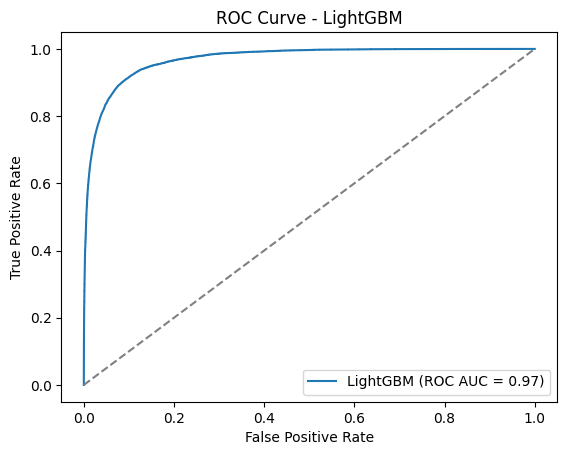

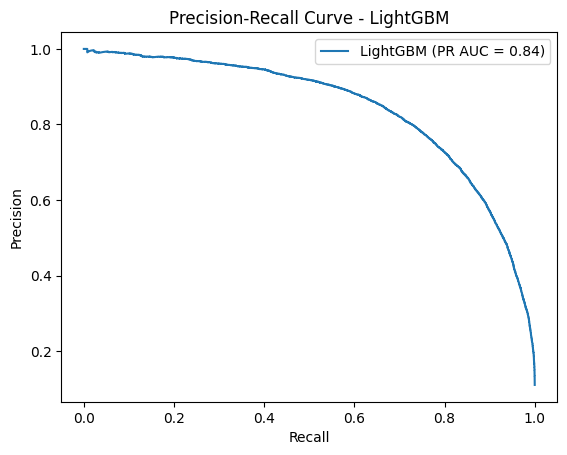


Evaluating CatBoost on Test Data

Metrics for CatBoost:
  Accuracy: 0.8933
  Precision: 0.5105
  Recall: 0.9090
  F1 Score: 0.6538
  ROC AUC: 0.9642
  PR AUC: 0.8195
  Class Accuracies: {'non_bankrupt': 0.8913605203023378, 'bankrupt': 0.9089562764456982}


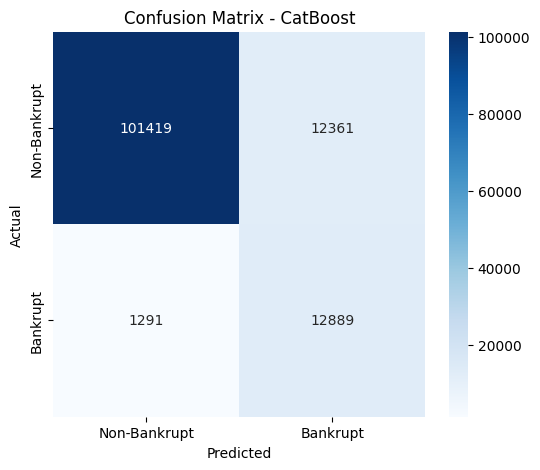

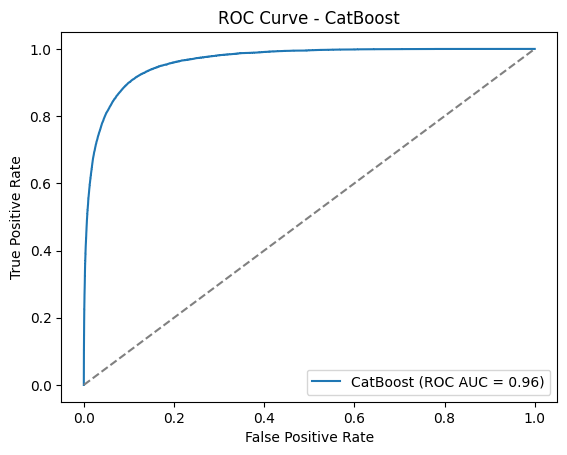

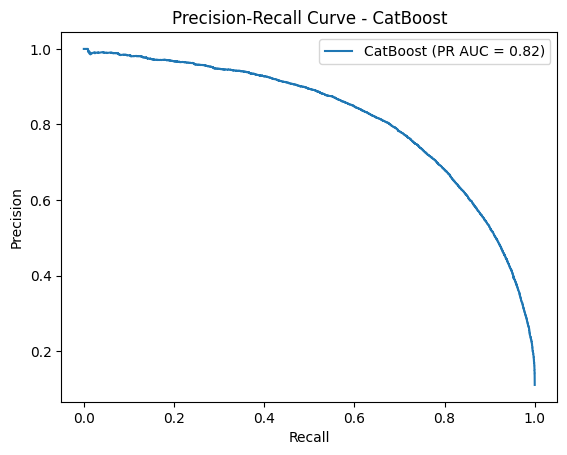

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Re-evaluate saved models
final_results = {}
pr_curves_final = {}
roc_curves_final = {}
for model_name, model in loaded_models.items():
    print(f"\nEvaluating {model_name} on Test Data")

    y_test_proba = model.predict_proba(X_test)[:, 1]  # Assuming predict_proba is available
    y_test_pred = (y_test_proba >= 0.5).astype(int)  # Default threshold 0.5

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_proba)

    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_acc = {
        "non_bankrupt": conf_matrix[0, 0] / conf_matrix[0].sum(),
        "bankrupt": conf_matrix[1, 1] / conf_matrix[1].sum()
    }
    pr_curve_precision, pr_curve_recall, _ = precision_recall_curve(y_test, y_test_proba)
    pr_auc = auc(pr_curve_recall, pr_curve_precision)

    # Store results
    final_results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc,
        "Class Accuracies": class_acc
    }

    # Display metrics
    print(f"\nMetrics for {model_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")
    print(f"  PR AUC: {pr_auc:.4f}")
    print(f"  Class Accuracies: {class_acc}")

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Bankrupt', 'Bankrupt'],
                yticklabels=['Non-Bankrupt', 'Bankrupt'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"{model_name} (ROC AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.title(f"ROC Curve - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    # Plot PR Curve
    plt.figure()
    plt.plot(pr_curve_recall, pr_curve_precision, label=f"{model_name} (PR AUC = {pr_auc:.2f})")
    plt.title(f"Precision-Recall Curve - {model_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.show()


#Feature Importance

In [15]:
# Feature Importance Storage
feature_importance_results = {}

# Compute Feature Importance for CatBoost, LightGBM, and XGBoost
for model_name, model in models.items():
    if model_name in ["CatBoost", "LightGBM", "XGBoost"]:
        # Retrieve feature importance
        if model_name == "CatBoost":
            importance = model.get_feature_importance()
        else:
            importance = model.feature_importances_

        # Store the feature importance in a dictionary
        feature_importance_results[model_name] = importance

        # Create a DataFrame for feature importance and sort by importance
        feature_importance_df = pd.DataFrame({
            "Feature": X.columns,
            "Importance": importance
        }).sort_values(by="Importance", ascending=False)

        # Display all features sorted by importance
        print(f"\nFeature Importance for {model_name}:")
        print(feature_importance_df.to_string(index=False))
    else:
        print(f"Skipping feature importance for {model_name}.")



Feature Importance for XGBoost:
                                                                                      Feature  Importance
                                                      Equity/Total Assets last available year    0.754359
                   Liquidity Ratios (total liquid funds)/Current Liabilities last avail. Year    0.034205
                       Liquidity Ratios (total liquid funds)/Current Liabilities last year -1    0.014742
                                              Profit After Taxes/Turnover last available year    0.014293
         Profitability Ratios (Return on Investment) Net Profit/Total Assets last avail. Year    0.012434
                      Liquidity Ratios (Current Liabilities − Cash)/Total Assets last year -2    0.012300
                       Liquidity Ratios (total liquid funds)/Current Liabilities last year -2    0.008267
                      Liquidity Ratios (Current Liabilities − Cash)/Total Assets last year -1    0.007370
             